In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import statsmodels.api as sm

In [38]:
cd /home/tommy/Desktop/EAP project

/home/tommy/Desktop/EAP project


In [40]:
data = pd.read_excel('PPI.xlsx')

In [41]:
data.Dates=pd.to_datetime(raw.Dates.astype(str))

In [42]:
data.Group.unique()

array(['EURUSD', 'GBPUSD', 'USDJPY', 'USDCAD', 'AUDUSD', 'USDCHF',
       'USDNOK', 'USDSEK', 'NZDUSD'], dtype=object)

In [116]:
data = data.rename(index = str, columns = {'PPIratio':'PPI'})

In [126]:
EURUSD = data.loc[data.Group == 'EURUSD',:]

In [128]:
X = sm.add_constant(EURUSD.PPI)

In [129]:
model = sm.OLS(EURUSD.FX,X).fit()

model.params

In [130]:
model.params

const    0.908544
PPI      0.310263
dtype: float64

In [131]:
fitted = model.params.const + model.params.PPI*EURUSD.PPI

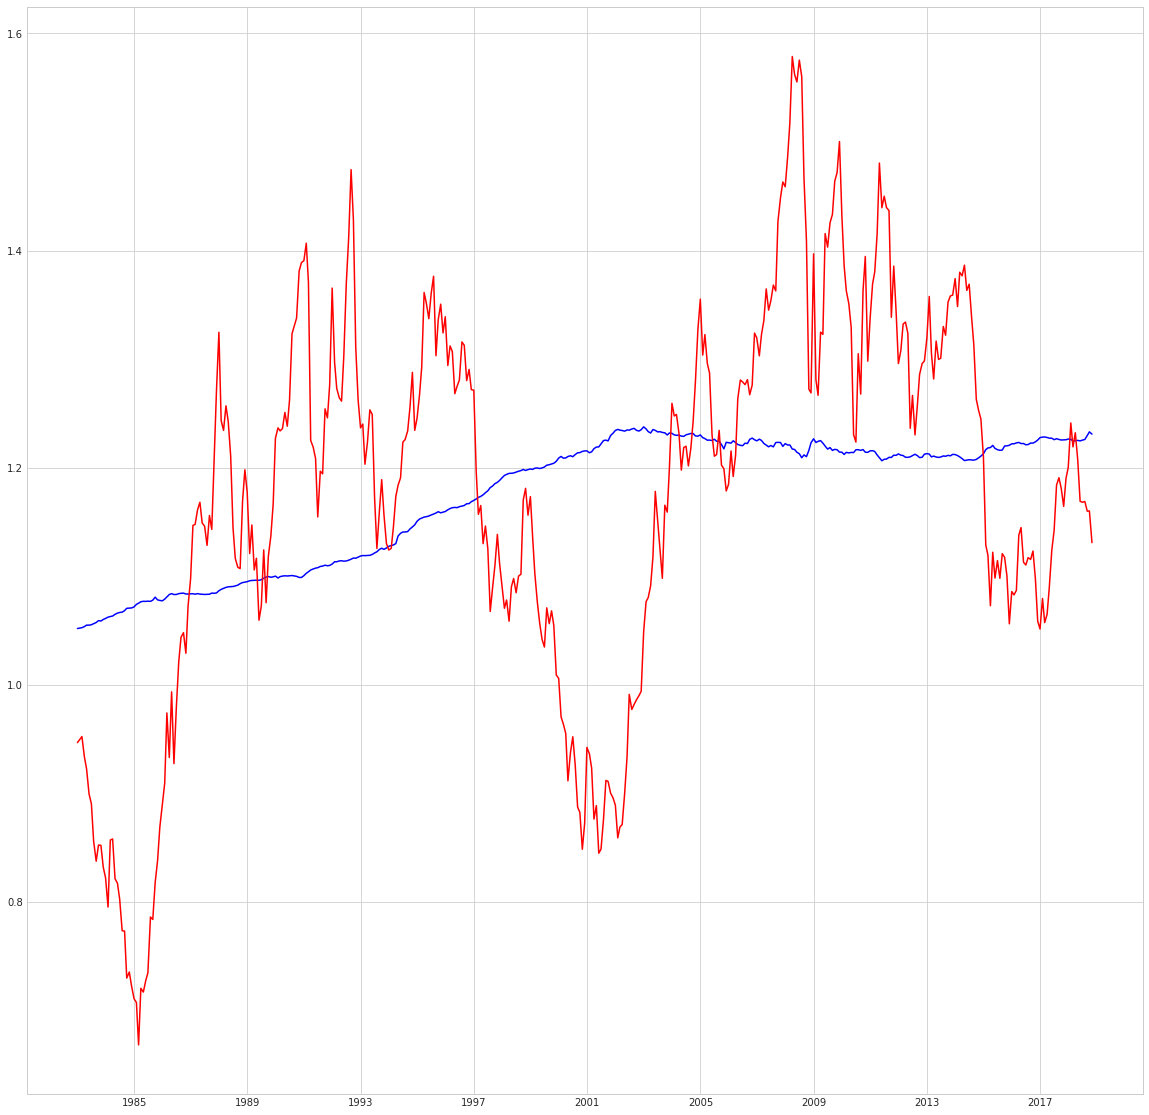

In [132]:
sns.set_style('whitegrid')
fig=plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(EURUSD.Dates,fitted,c='blue')
ax1.plot(EURUSD.Dates,EURUSD.FX,c='red')



AttributeError: 'DataFrame' object has no attribute 'date'

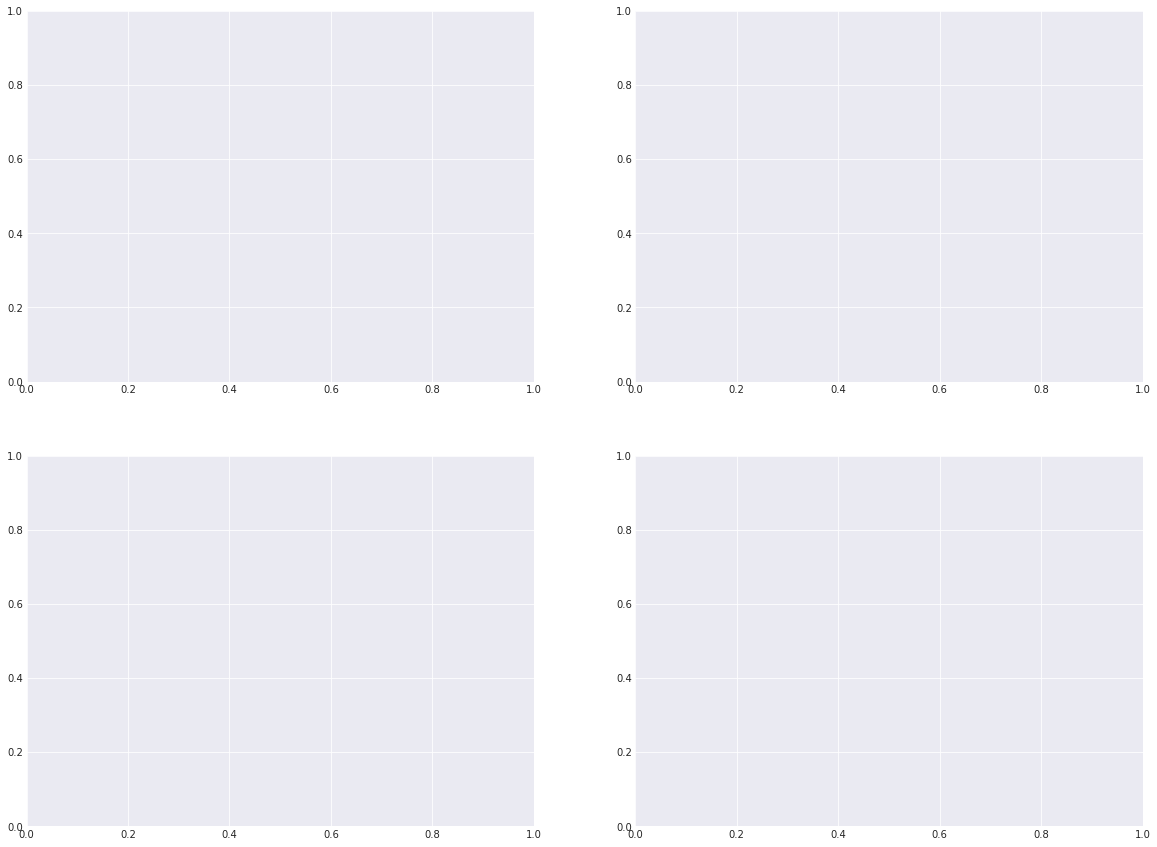

In [106]:
#plot return series
%matplotlib inline
sns.set_style('darkgrid')
fig=plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(data.date,data.Rew,c='blue')
ax1.set_title('Equal-Weighted S&P500 Monthly Return',fontsize ='xx-large', fontweight ='bold')
ax1.set_xlabel('Year',fontsize ='xx-large')
ax1.set_ylabel('R', rotation = 90, fontsize ='xx-large')
ax3.set_ylim(.7,1.3)